### Pipeline
* Collection of Data
* Image Processing (Converting into numpy array , As for deep learning (x,x,3) type of matrix make same size all the image )
* Split the data into train Test
* Train the CNN model
* Analyis the mdoel




In [1]:
# !pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#API to tetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 96% 157M/163M [00:01<00:00, 180MB/s]
100% 163M/163M [00:01<00:00, 160MB/s]


In [4]:
#extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset ,'r') as zip:
  zip.extractall()
  print("The Dataset is Extracted")

The Dataset is Extracted


Impoting Dependices

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
import PIL.Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
# create a list with file name
with_mask_files = os.listdir("/content/data/with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_973.jpg', 'with_mask_758.jpg', 'with_mask_3000.jpg', 'with_mask_2151.jpg', 'with_mask_2539.jpg']
['with_mask_1442.jpg', 'with_mask_3372.jpg', 'with_mask_1151.jpg', 'with_mask_2375.jpg', 'with_mask_1696.jpg']


In [7]:
without_mask_files = os.listdir("/content/data/without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3420.jpg', 'without_mask_148.jpg', 'without_mask_1935.jpg', 'without_mask_68.jpg', 'without_mask_28.jpg']
['without_mask_2752.jpg', 'without_mask_1924.jpg', 'without_mask_3083.jpg', 'without_mask_3747.jpg', 'without_mask_2085.jpg']


In [8]:
print("Number of images with mask :",len(with_mask_files))

Number of images with mask : 3725


In [9]:
print("Number of images without mask :",len(without_mask_files))

Number of images without mask : 3828


Creating Labels for the two classes

with mask --> 1
without mask --> 0

In [10]:
# creating the labels

with_mask_labels = [1]*3725
without_mask_labels =[0]*3828

In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels +without_mask_labels
print(len(labels))
print(labels[0:5],labels[-5:])

7553
[1, 1, 1, 1, 1] [0, 0, 0, 0, 0]


** Disaplaying the Images **

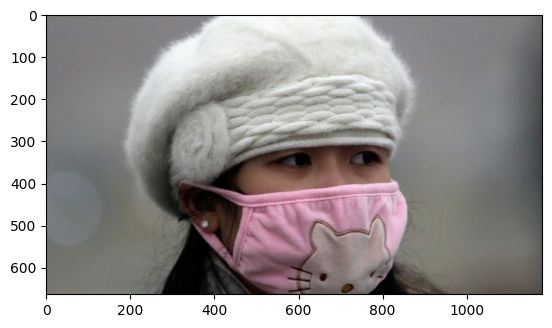

In [14]:
# diaplaying with mask images
img = mpimg.imread('/content/data/with_mask/with_mask_3372.jpg')
imgplot = plt.imshow(img)
plt.show()

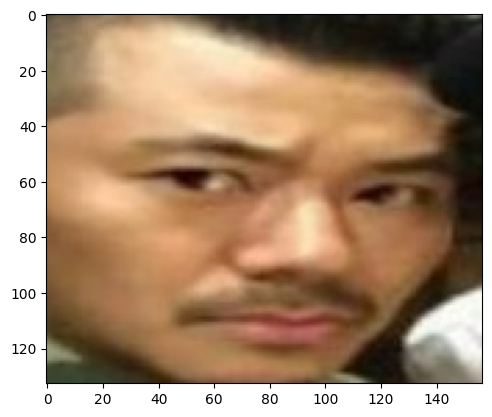

In [15]:
# diaplaying without mask images
img = mpimg.imread('/content/data/without_mask/without_mask_68.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**


1. Resize the image
2. Covert image into numpy array

In [16]:
# convert image into numpy arrays

with_mask_path = '/content/data/with_mask/'

data =[]

for img_file in with_mask_files:
  image =  PIL.Image.open(with_mask_path + img_file) #parameter image path
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image =  PIL.Image.open(without_mask_path + img_file) #parameter image path
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
print(type(data))

<class 'list'>


In [19]:
print(len(data))

7553


In [20]:
data[0].shape

(128, 128, 3)

In [21]:
# converting imahe list and labels list into numpy array
X= np.array(data)
Y = np.array(labels)

print(type(X),type(Y))
print(X.shape,Y.shape)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(7553, 128, 128, 3) (7553,)


Train Test Split

In [22]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size =0.2,random_state =2 )

In [23]:
print(X.shape, Y.shape)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7553, 128, 128, 3) (7553,)
(6042, 128, 128, 3) (6042,)
(1511, 128, 128, 3) (1511,)


In [24]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [25]:
print(X_train[0])
print(X_train_scaled[0])

[[[146  93  43]
  [146  93  43]
  [148  95  45]
  ...
  [161 110  63]
  [154 106  59]
  [151 107  60]]

 [[147  94  44]
  [147  94  44]
  [149  96  46]
  ...
  [161 110  63]
  [156 108  61]
  [154 110  63]]

 [[147  94  44]
  [147  94  44]
  [149  96  46]
  ...
  [161 110  63]
  [157 110  63]
  [158 114  66]]

 ...

 [[ 31  34  25]
  [ 31  34  25]
  [ 30  33  24]
  ...
  [178 124  77]
  [176 122  77]
  [175 121  77]]

 [[ 32  34  26]
  [ 32  34  25]
  [ 31  33  24]
  ...
  [175 121  75]
  [175 122  75]
  [175 122  77]]

 [[ 34  35  27]
  [ 33  34  26]
  [ 32  33  25]
  ...
  [172 118  69]
  [173 121  73]
  [176 125  78]]]
[[[0.57254902 0.36470588 0.16862745]
  [0.57254902 0.36470588 0.16862745]
  [0.58039216 0.37254902 0.17647059]
  ...
  [0.63137255 0.43137255 0.24705882]
  [0.60392157 0.41568627 0.23137255]
  [0.59215686 0.41960784 0.23529412]]

 [[0.57647059 0.36862745 0.17254902]
  [0.57647059 0.36862745 0.17254902]
  [0.58431373 0.37647059 0.18039216]
  ...
  [0.63137255 0.4313725

**Building Covolution Neural Network CNN**

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
num_of_classes = 2

model = keras.Sequential() ## stack all the layers 1. Flatten Vector layer 2. neuron dense layer 3.output layer

model.add(keras.layers.Conv2D(32 , kernel_size=(3,3) , activation ='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation ='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))


In [28]:
## Compile the neural network
model.compile(optimizer='adam',
              loss ='sparse_categorical_crossentropy',
              metrics=['acc'])

In [29]:
# training Neural network

history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
170/170 [==============================] - 17s 25ms/step - loss: 0.5507 - acc: 0.7269 - val_loss: 0.2796 - val_acc: 0.8810
Epoch 2/10
170/170 [==============================] - 3s 19ms/step - loss: 0.3150 - acc: 0.8766 - val_loss: 0.2239 - val_acc: 0.8926
Epoch 3/10
170/170 [==============================] - 3s 20ms/step - loss: 0.2525 - acc: 0.9001 - val_loss: 0.2260 - val_acc: 0.9025
Epoch 4/10
170/170 [==============================] - 3s 20ms/step - loss: 0.2119 - acc: 0.9176 - val_loss: 0.2550 - val_acc: 0.8793
Epoch 5/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1808 - acc: 0.9358 - val_loss: 0.2240 - val_acc: 0.9091
Epoch 6/10
170/170 [==============================] - 3s 19ms/step - loss: 0.1576 - acc: 0.9402 - val_loss: 0.2329 - val_acc: 0.9223
Epoch 7/10
170/170 [==============================] - 3s 18ms/step - loss: 0.1261 - acc: 0.9542 - val_loss: 0.2515 - val_acc: 0.9140
Epoch 8/10
170/170 [==============================] - 3s 18ms/step -

In [30]:
# Model Evaluation

loss , accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy:',accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2511 - acc: 0.9252
Test Accuracy: 0.9252150654792786


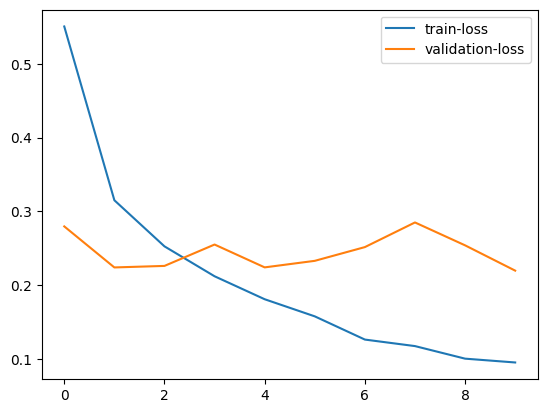

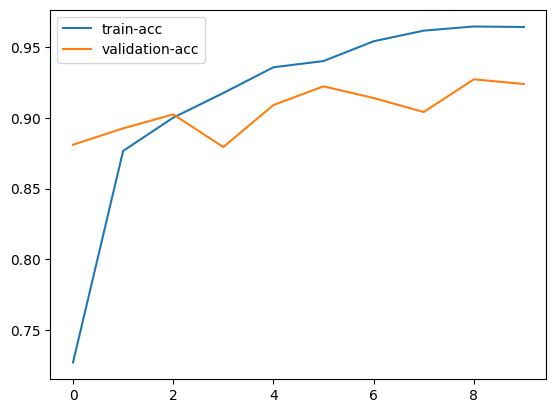

In [31]:
h= history

# plot for loss value
plt.plot(h.history['loss'],label ='train-loss')
plt.plot(h.history['val_loss'],label ='validation-loss')
plt.legend()
plt.show()

#plot for acuuracy value
plt.plot(h.history['acc'],label ='train-acc')
plt.plot(h.history['val_acc'],label ='validation-acc')
plt.legend()
plt.show()

Path of the image to be predicted/content/data/with_mask/with_mask_3372.jpg


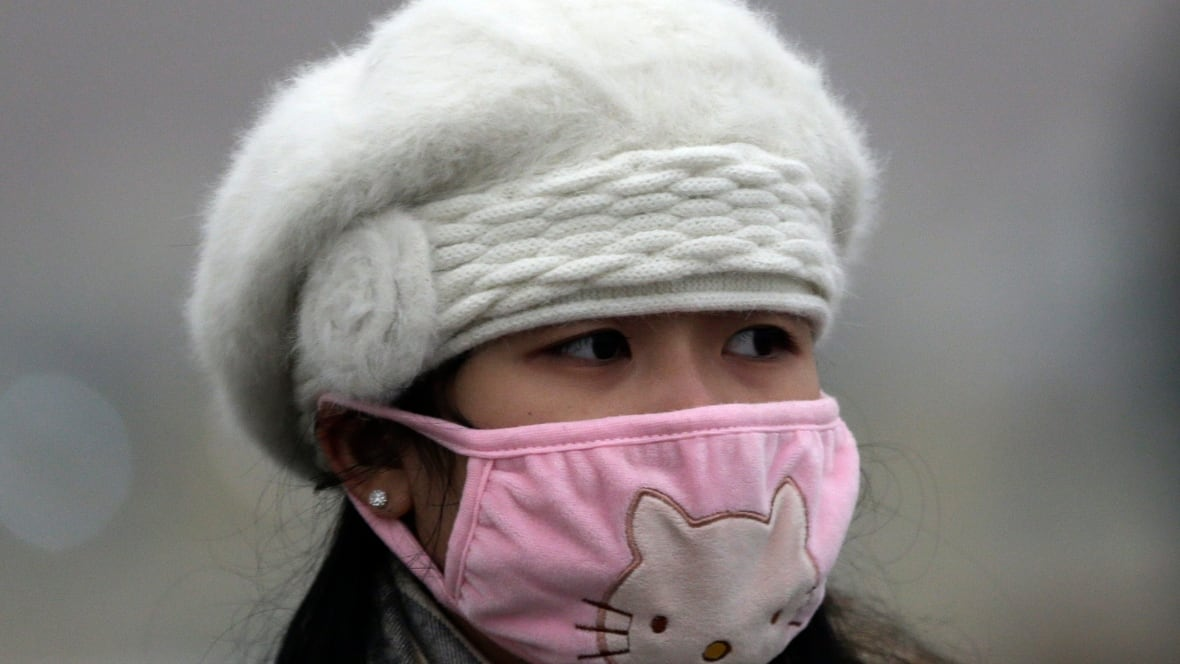

1/1 [==============================] - 0s 429ms/step
[[0.10890649 0.93834907]]
1
Person is Wearing a Mask


In [32]:
#implimenting the Model

input_image_path= input("Path of the image to be predicted")

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image ,(128,128))
input_image_scaled =input_image_resized /255
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])
input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label ==1:
  print("Person is Wearing a Mask")
else :
  print("Person is Not wearing a Mask")
